In [1]:
import numpy as np
import pandas as pd

import os

### Time consumption for each cases

In [2]:
data_folder = '../data/routes_short_2023-05-05|22:07:50/'

image_folders = []
for sub_folder in os.listdir(data_folder):
    if not sub_folder.endswith('.csv'): 
        image_folders.append(data_folder+sub_folder)
image_folders.sort()
image_folders = image_folders[:-1]
len(image_folders), image_folders[0]

(439, '../data/routes_short_2023-05-05|22:07:50/routes_short_05_05_22_08_00')

In [7]:
number_of_frames = []
tuple_frame_file = []
for image_folder in image_folders:
    number_of_frames.append(len(os.listdir(image_folder+"/bev")))
    tuple_frame_file.append((len(os.listdir(image_folder+"/bev")), image_folder+"/bev"))

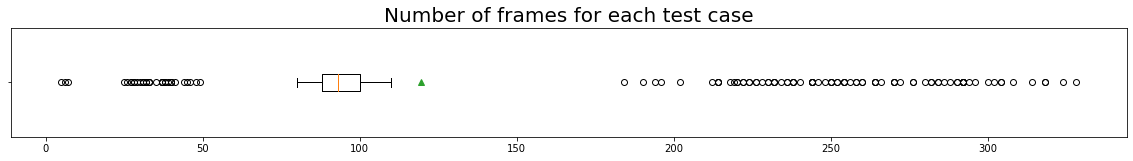

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,2))
plt.boxplot(number_of_frames, labels=[''], vert=False, showmeans=True)
plt.title("Number of frames for each test case", fontsize=20)
plt.show()

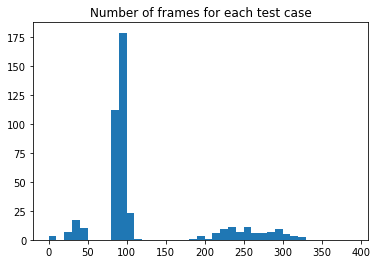

array([  3.,   0.,   7.,  17.,  10.,   0.,   0.,   0., 112., 179.,  23.,
         1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   3.,   1.,   6.,
         9.,  11.,   7.,  11.,   6.,   6.,   7.,   9.,   5.,   3.,   2.,
         0.,   0.,   0.,   0.,   0.,   0.])

In [5]:
bins = plt.hist(number_of_frames, bins=range(0,400,10))
plt.title("Number of frames for each test case")
plt.show()
bins[0]

In [10]:
tuple_frame_file.sort()
tuple_frame_file[:5]

[(5,
  '../data/routes_short_2023-05-05|22:07:50/routes_short_05_06_05_46_27/bev'),
 (6,
  '../data/routes_short_2023-05-05|22:07:50/routes_short_05_06_05_35_27/bev'),
 (7,
  '../data/routes_short_2023-05-05|22:07:50/routes_short_05_06_02_10_40/bev'),
 (25,
  '../data/routes_short_2023-05-05|22:07:50/routes_short_05_06_02_48_39/bev'),
 (26,
  '../data/routes_short_2023-05-05|22:07:50/routes_short_05_06_01_01_06/bev')]

### Fitness score and number

(439, 14)


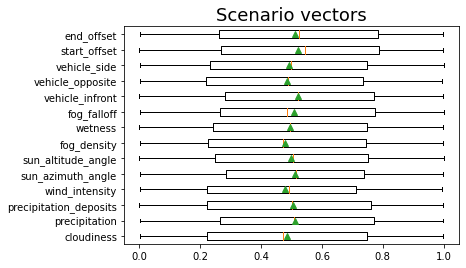

In [11]:
scenario_header = ["cloudiness",
                   "precipitation",
                   "precipitation_deposits",
                   "wind_intensity",
                   "sun_azimuth_angle",
                   "sun_altitude_angle",
                   "fog_density",
                   "wetness",
                   "fog_falloff",
                   "vehicle_infront", 
                   "vehicle_opposite", 
                   "vehicle_side",
                   "start_offset",
                   "end_offset"]
scenarios = pd.read_csv(data_folder+'scenario.csv',names=scenario_header)
print(scenarios.shape)
        
# plt.figure(figsize=(20,2))
plt.boxplot(scenarios, labels=scenario_header, vert=False, showmeans=True)
plt.title("Scenario vectors", fontsize=18)
plt.show()

(439, 5)


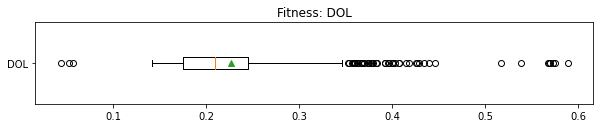

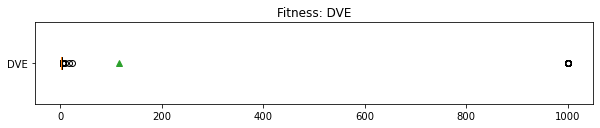

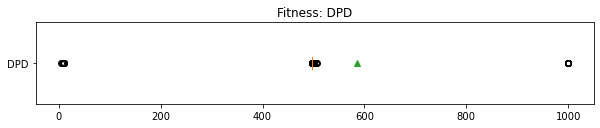

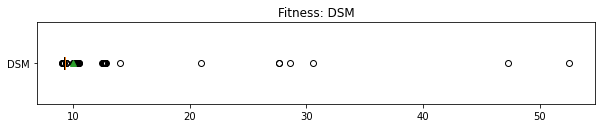

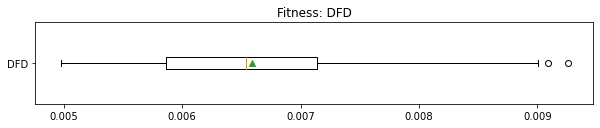

In [12]:
fitness_header = ["DOL","DVE","DPD","DSM","DFD"]
fitnesses = pd.read_csv(data_folder+'fitness.csv',names=fitness_header)
print(fitnesses.shape)
        
for fitness_label in fitness_header:
    plt.figure(figsize=(10,1.5))
    plt.boxplot(fitnesses[fitness_label], labels=[fitness_label], vert=False, showmeans=True)
    plt.title('Fitness: '+fitness_label)
    plt.show()

In [13]:
criterion_header = ["RouteCompletionTest",   
                    "RouteCompletionTest_figure",
                    "OutsideRouteLanesTest", 
                    "OutsideRouteLanesTest_figure",
                    "CollisionTest",         
                    "CollisionTest_figure",
                    "RunningRedLightTest",   
                    "RunningRedLightTest_figure",
                    "RunningStopTest",       
                    "RunningStopTest_figure",
                    "InRouteTest", 
                    "InRouteTest_figure",          
                    "AgentBlockedTest",
                    "AgentBlockedTest_figure",      
                    "Timeout"]
criterions = pd.read_csv(data_folder+'criterion-replace.csv',names=criterion_header)
print(criterions.shape)

(439, 15)


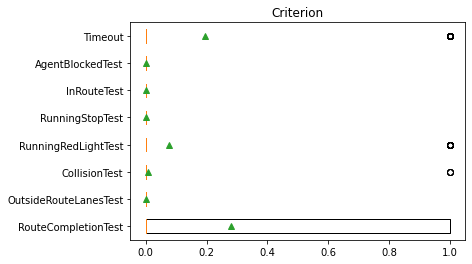

In [14]:
criterion_bool_head = ["RouteCompletionTest",   
                        "OutsideRouteLanesTest", 
                        "CollisionTest",         
                        "RunningRedLightTest",   
                        "RunningStopTest",       
                        "InRouteTest", 
                        "AgentBlockedTest",
                        "Timeout"]
# plt.figure(figsize=(10,1.5))
plt.boxplot(criterions[criterion_bool_head], labels=criterion_bool_head, vert=False, showmeans=True)
plt.title('Criterion')
plt.show()

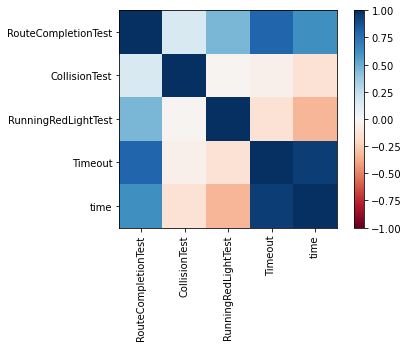

In [38]:
criterion_time = pd.concat([criterions[['RouteCompletionTest','CollisionTest','RunningRedLightTest','Timeout']],pd.DataFrame({'time':number_of_frames})],axis=1)
plt.imshow(criterion_time.corr().to_numpy(), cmap='RdBu', vmin=-1, vmax=1)
plt.yticks(range(5),criterion_time.columns.tolist())
plt.xticks(range(5),criterion_time.columns.tolist(),rotation=90)
plt.colorbar()
plt.show()

In [10]:
(criterions[criterion_bool_head] == 1).sum()

RouteCompletionTest      123
OutsideRouteLanesTest      0
CollisionTest              4
RunningRedLightTest       33
RunningStopTest            0
InRouteTest                0
AgentBlockedTest           0
Timeout                   86
dtype: int64

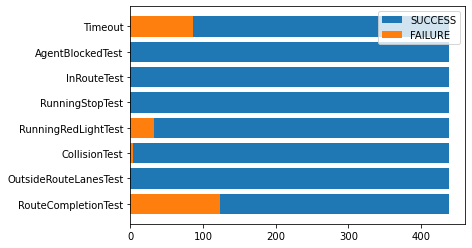

In [11]:
import matplotlib.pyplot as plt

plt.barh(criterion_bool_head, [439]*8)
plt.barh(criterion_bool_head, (criterions[criterion_bool_head] == 1).sum())
plt.legend(['SUCCESS','FAILURE'])
plt.show()

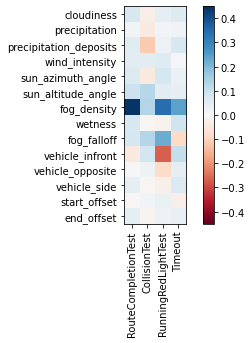

In [16]:
scenario_criterion = pd.concat([scenarios, criterions[["RouteCompletionTest", "CollisionTest", "RunningRedLightTest", "Timeout"]]],axis=1)

plt.imshow(scenario_criterion.corr().to_numpy()[:14, 14:18], cmap='RdBu', vmin=-.45, vmax=.45)
plt.yticks(range(14),scenario_criterion.columns.tolist()[:14])
plt.xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
plt.colorbar()
plt.show()
# Positive means easy to cause failure

,cloudiness,precipitation,precipitation_deposits,wind_intensity,sun_azimuth_angle,sun_altitude_angle,fog_density,wetness,fog_falloff,vehicle_infront,vehicle_opposite,vehicle_side,start_offset,end_offset
0,0.071136,0.273546,0.655469,0.198134,0.720386,0.244049,0.676710,0.759941,0.051406,0.988784,0.226244,0.204948,0.784768,0.202398
1,0.375515,0.653659,0.719721,0.147626,0.557042,0.865031,0.554341,0.738864,0.485065,0.361723,0.966843,0.116823,0.050662,0.037090
2,0.396908,0.266277,0.175777,0.231517,0.410776,0.285436,0.015449,0.404476,0.056316,0.605676,0.824694,0.105960,0.330345,0.480143
3,0.308592,0.509314,0.159497,0.360004,0.335843,0.021912,0.100606,0.093278,0.127418,0.212385,0.064637,0.058994,0.487564,0.642052
4,0.847700,0.696302,0.407896,0.490933,0.949995,0.158169,0.740556,0.950721,0.892074,0.930402,0.674357,0.539991,0.044751,0.931640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,0.737023,0.488781,0.430072,0.057317,0.195883,0.833937,0.678136,0.663629,0.506084,0.069737,0.331663,0.555475,0.560858,0.307836
435,0.691164,0.895655,0.897923,0.581900,0.842071,0.130811,0.480834,0.660447,0.281690,0.923852,0.433620,0.392038,0.780196,0.891311
436,0.793815,0.683412,0.002570,0.744070,0.809537,0.859068,0.808822,0.811194,0.439028,0.273048,0.075028,0.656146,0.102465,0.664017
437,0.022925,0.815955,0.129537,0.648136,0.594590,0.051505,0.647217,0.345200,0.792262,0.865359,0.826071,0.050037,0.257980,0.422620


353

In [56]:
class_weight={0:sum(y==0)/len(y), 1:sum(y==1)/len(y)}
class_weight

{0: 0.8041002277904328, 1: 0.1958997722095672}

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

seed = 42

max_f1_sum = 0
for i in range(1,21):
    print(i)
    f1_sum = 0
    for certion_label in ["RouteCompletionTest", "CollisionTest", "RunningRedLightTest", "Timeout"]:
        X = scenario_criterion[scenario_criterion.columns.tolist()[:14]].to_numpy()
        y = scenario_criterion[certion_label].to_numpy()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)


        clf = RandomForestClassifier(max_depth=i, random_state=seed, class_weight={0:sum(y==1)/len(y), 1:sum(y==0)/len(y)})
        # clf = LogisticRegression(random_state=seed)
        clf.fit(X_train, y_train)

        acc = sum(clf.predict(X_test)==y_test)/len(y_test)
        print(round(f1_score(clf.predict(X_train), y_train), 5), round(f1_score(clf.predict(X_test), y_test), 5))
        # print(clf.predict(X_test))
        f1_sum += f1_score(clf.predict(X_test), y_test)
    print()


1
0.68783 0.53488
0.85714 0.0
0.68966 0.61538
0.55952 0.32099

2
0.71429 0.54545
1.0 0.0
0.93333 0.66667
0.64474 0.33766

3
0.76243 0.53659
1.0 0.0
0.97674 0.625
0.76336 0.32787

4
0.80925 0.51948
1.0 0.0
1.0 0.53333
0.88333 0.38298

5
0.92308 0.56338
1.0 0.0
1.0 0.42857
0.96667 0.3

6
0.9881 0.48571
1.0 0.0
1.0 0.30769
1.0 0.12121

7
1.0 0.46875
1.0 0.0
1.0 0.30769
1.0 0.13793

8
1.0 0.44068
1.0 0.0
1.0 0.30769
1.0 0.06897

9
1.0 0.38596
1.0 0.0
1.0 0.16667
1.0 0.07143

10
1.0 0.36364
1.0 0.0
1.0 0.16667
1.0 0.0

11
1.0 0.37037
1.0 0.0
1.0 0.16667
1.0 0.0

12
1.0 0.4
1.0 0.0
1.0 0.16667
1.0 0.0

13
1.0 0.39286
1.0 0.0
1.0 0.16667
1.0 0.07143

14
1.0 0.37037
1.0 0.0
1.0 0.16667
1.0 0.07143

15
1.0 0.4
1.0 0.0
1.0 0.16667
1.0 0.07143

16
1.0 0.4
1.0 0.0
1.0 0.16667
1.0 0.07143

17
1.0 0.4
1.0 0.0
1.0 0.16667
1.0 0.07143

18
1.0 0.4
1.0 0.0
1.0 0.16667
1.0 0.07143

19
1.0 0.4
1.0 0.0
1.0 0.16667
1.0 0.07143

20
1.0 0.4
1.0 0.0
1.0 0.16667
1.0 0.07143



In [33]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])